In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris-dataset/Iris_dataset.csv


# *Reading Dataset*

In [2]:
df = pd.read_csv('/kaggle/input/iris-dataset/Iris_dataset.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# X & y for further training and testing

In [3]:
X = df.drop(columns=['target','flower_name'])
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

# *Scaling the data*

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# *Using cross_val_score with folds = 3*

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
score_lr = list(cross_val_score(LogisticRegression(),X_scaled,y,cv=3))
score_lr

# cv = 3 -> defines number of folds and i have stored all three score in a list called score_lr

[0.98, 0.96, 0.96]

In [10]:
score_svm = list(cross_val_score(SVC(),X_scaled,y,cv=3))
score_svm

[0.98, 0.96, 0.96]

In [11]:
score_rf = list(cross_val_score(RandomForestClassifier(),X_scaled,y,cv=3))
score_rf

[0.98, 0.94, 0.94]

# *Visualization of all accuracies*

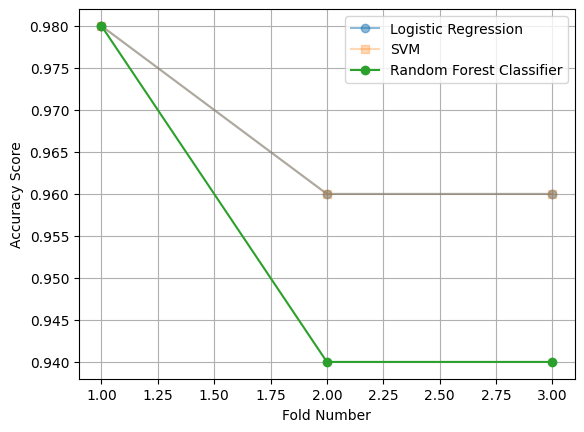

In [12]:
plt.plot(range(1,4),score_lr,marker='o',label="Logistic Regression",alpha=0.5)
plt.plot(range(1,4),score_svm,marker='s',label="SVM",alpha=0.3)
# Note here plot for score_lr and score_svm is overlapped

plt.plot(range(1,4),score_rf,marker='o',label="Random Forest Classifier")
plt.xlabel("Fold Number")
plt.ylabel("Accuracy Score")
plt.legend()
plt.grid()

# *Best consistent model*

In [13]:
avg_lr = sum(score_lr) / len(score_lr)
avg_svm = sum(score_svm) / len(score_svm)
avg_rf = sum(score_rf) / len(score_rf)
best_avg_accuracy = max(avg_lr, avg_svm, avg_rf)

In [14]:
best_avg_model = max(
    {"Logistic Regression": avg_lr, "SVM": avg_svm, "Random Forest": avg_rf},
    key=lambda x: {"Logistic Regression": avg_lr, "SVM": avg_svm, "Random Forest": avg_rf}[x]
)

In [15]:
print(f"Most Consistent Model: {best_avg_model} with Average Accuracy: {best_avg_accuracy:.4f}")
# SVM and Logistic Regression both have same scores thus both are highly consistent

Most Consistent Model: Logistic Regression with Average Accuracy: 0.9667


# *Stratified K-folds classifier*

In [16]:
# here we have done the same thing as we have done with the help of cross_val_score but here
# we have used statrified k-fold and we did the things manually as below while the cross val
# score does things automatically but here this is the internal structure of cross val score
# now here we can also use only kfold but stratified one is quite better

# What is Stratified K-Fold?

# Now, let’s say your pizza has two types of toppings:
# 7 slices have cheese
# 3 slices have pepperoni
# A normal K-Fold might split them randomly, so some test groups only have cheese and no p
# epperoni!That’s not balanced.

# Stratified K-Fold fixes this by making sure each test group keeps the same proportion 
# of cheese and pepperoni, just like in the original pizza.

In [17]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)

In [18]:
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [19]:
l,svm,rf = [],[],[]

In [20]:
for train_index,test_index in skf.split(X,y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  l.append(get_score(LogisticRegression(),X_train,X_test,y_train,y_test))
  svm.append(get_score(SVC(),X_train,X_test,y_train,y_test))
  rf.append(get_score(RandomForestClassifier(n_estimators=40),X_train,X_test,y_train,y_test))

In [21]:
l

[0.98, 0.96, 0.94]

In [22]:
svm

[0.98, 0.96, 0.96]

In [23]:
rf

[0.98, 0.94, 0.98]